In [1]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
%matplotlib inline

In [ ]:
pd.set_option("display.max_columns", 100)

In [2]:
comments_path = 'data/comments_-33041211.pkl'
users_path = 'data/users_-33041211.pkl'

In [3]:
with open(comments_path, 'rb') as f:
    comments = pickle.load(f)
with open(users_path, 'rb') as f:
    users = pickle.load(f)

In [4]:
comments_df = pd.DataFrame(comments)

In [5]:
comments_df.head()

,attachments,comment_id,date,from_id,likes,owner_id,reply_to_cid,reply_to_uid,text
0,None,3222687,1476546572,310448946,0,-33041211,None,None,Мой мир никогда не станет прежним
1,None,3222688,1476546577,65801702,80,-33041211,None,None,Только Факел - только победа!!!!
2,None,3222689,1476546593,17288600,0,-33041211,None,None,и убегает с поля 😨\nумно!
3,None,3222690,1476546602,36494568,19,-33041211,None,None,Спасибо тебе родной
4,None,3222695,1476546647,146226190,3,-33041211,None,None,ОБОЖАЮ


In [6]:
comments_df.shape

(2552261, 9)

# Preparing data

In [7]:
def university_cond(user):
    return len(user.get('universities', [])) == 1

In [8]:
def faculty_cond(user):
    return user['universities'][0].get('faculty_name') is not None

In [9]:
users_with_univ = list(filter(university_cond, users))
users_with_fac = list(filter(faculty_cond, users_with_univ))

In [10]:
len(users_with_univ), len(users_with_fac)

(13721, 10492)

In [11]:
users_with_fac[3]

{'activities': 'fanático de películas de dibujos animados (Family Guy)',
 'books': "Pikul', Strugatskiy's",
 'can_see_all_posts': 0,
 'can_see_audio': 1,
 'can_write_private_message': 1,
 'first_name': 'Vladimir',
 'id': 8126548,
 'interests': 'idiomas extranjeras',
 'last_name': 'Orlov',
 'movies': '',
 'music': 'ASOT, IKON, lounge, chill-out, Solarsoul, Placebo (primeros), Y. Schevchuk, Depeche Mode, U2 etc',
 'occupation': {'id': 446,
  'name': 'ВГУИТ (бывш. ВГТА, ВТИ)',
  'type': 'university'},
 'personal': {'alcohol': 4,
  'inspired_by': 'Хомэр Симпсон',
  'people_main': 6,
  'political': 8,
  'religion': 'I want to believe',
  'smoking': 3},
 'relation': 4,
 'relation_partner': {'first_name': 'Maria',
  'id': 3491163,
  'last_name': 'Orlova'},
 'sex': 2,
 'status': '- Следите за лишним весом? - Слежу. За тем, как он растёт.',
 'universities': [{'chair': 58493,
   'chair_name': 'Технологии молока и молочных продуктов',
   'city': 0,
   'country': 1,
   'education_form': 'Full-time

In [12]:
users_ = []
for u in users_with_fac:
    u.pop('occupation', None)
    u.pop('relation_partner', None)
    univ = u.pop('universities')[0]
    u.update({'univ_name': univ['name'], 'faculty_name': univ['faculty_name'],
              'education_form': univ.get('education_form'), 'education_status': univ.get('education_status'),
              'graduation': univ.get('graduation')})
    pers = u.pop('personal')
    if pers:
        u.update({'political': pers.get('political'), 'langs': ','.join(pers.get('langs', [])),
                  'religion': pers.get('religion'), 'inspired_by': pers.get('inspired_by'),
                  'people_main': pers.get('people_main'), 'life_main': pers.get('life_main'),
                  'smoking': pers.get('smoking'), 'alcohol': pers.get('alcohol')})
    users_.append(u)

In [13]:
users_[0]

{'activities': '',
 'alcohol': 4,
 'bdate': '19.5',
 'books': '',
 'can_see_all_posts': 0,
 'can_see_audio': 0,
 'can_write_private_message': 1,
 'education_form': 'Full-time',
 'education_status': 'Student (Specialist)',
 'faculty_name': 'Архитектурный',
 'first_name': 'Maxim',
 'graduation': 2013,
 'id': 3932177,
 'inspired_by': 'Близкие люди',
 'interests': '',
 'langs': 'Русский,English',
 'last_name': 'Smirnov',
 'life_main': 6,
 'movies': '',
 'music': '',
 'people_main': 2,
 'political': 3,
 'relation': 1,
 'religion': 'Православие',
 'sex': 2,
 'smoking': 4,
 'status': '',
 'univ_name': 'Воронежский ГАСУ'}

In [14]:
users_df = pd.DataFrame(users_)

In [17]:
with open('ing_.txt', 'w') as f:
    f.writelines('\n'.join(users_df.faculty_name.value_counts()[(users_df.faculty_name.value_counts() > 4)].keys().values))

In [18]:
(users_df.faculty_name.value_counts() > 4).sum()

146

In [19]:
users_df.faculty_name.value_counts()[(users_df.faculty_name.value_counts() > 4)].values.sum()

9071

In [15]:
with open('ing.txt', 'r') as f:
    ing = [line.strip() for line in f.readlines()]
with open('gum.txt', 'r') as f:
    gum = [line.strip() for line in f.readlines()]

In [16]:
ing[:3], gum[:3]

(['Экономический факультет',
  'Экономический',
  'Факультет прикладной математики, информатики и механики'],
 ['Юридический факультет', 'Лечебный факультет', 'Факультет журналистики'])

In [17]:
users_df['is_gum'] = None

In [18]:
def get_is_gum(name):
    name = name.strip()
    if name in gum:
        return 1
    elif name in ing:
        return 0
    else: return None

In [19]:
users_df.is_gum = users_df.faculty_name.apply(get_is_gum)

In [20]:
users_df.dropna(subset=['is_gum'], inplace=True)

In [21]:
users_df.is_gum.value_counts()

1.0    3912
0.0    3245
Name: is_gum, dtype: int64

In [22]:
users_df.columns

Index(['activities', 'alcohol', 'bdate', 'books', 'can_see_all_posts',
       'can_see_audio', 'can_write_private_message', 'education_form',
       'education_status', 'faculty_name', 'first_name', 'graduation', 'id',
       'inspired_by', 'interests', 'langs', 'last_name', 'life_main', 'movies',
       'music', 'people_main', 'political', 'relation', 'religion', 'sex',
       'smoking', 'status', 'status_audio', 'univ_name', 'is_gum'],
      dtype='object')

# Demographic

## Sex

In [23]:
users_vc = users_df.is_gum.value_counts()
users_vc

1.0    3912
0.0    3245
Name: is_gum, dtype: int64

In [29]:
delta = users_vc[1] - users_vc[0]
delta

667

In [30]:
index_to_del = np.random.choice(users_df[users_df.is_gum == 1].index, delta, replace=False)

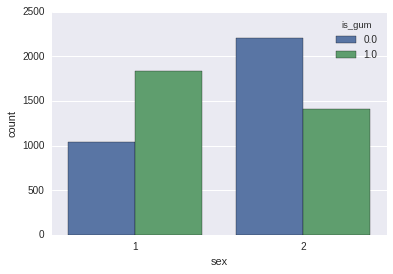

In [31]:
g = sns.countplot(x='sex', hue='is_gum',  data=users_df.drop(index_to_del))

## Alcohol

In [32]:
alcohol_df = users_df.dropna(subset=['alcohol'])
alcohol_vc = alcohol_df.is_gum.value_counts()
alcohol_vc

1.0    1448
0.0    1195
Name: is_gum, dtype: int64

In [33]:
delta = alcohol_vc[1] - alcohol_vc[0]
delta

253

In [34]:
index_to_del = np.random.choice(alcohol_df[alcohol_df.is_gum == 1].index, delta, replace=False)
alcohol_df.drop(index_to_del, inplace=True)
alcohol_df.is_gum.value_counts()

/home/digitman/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


1.0    1195
0.0    1195
Name: is_gum, dtype: int64

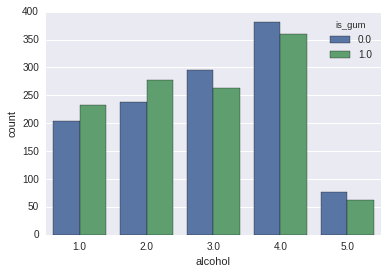

In [35]:
g = sns.countplot(x='alcohol', hue='is_gum',  data=alcohol_df)

## Smoking

In [36]:
smoking_df = users_df.dropna(subset=['smoking'])
smoking_vc = smoking_df.is_gum.value_counts()
smoking_vc

1.0    1503
0.0    1236
Name: is_gum, dtype: int64

In [37]:
delta = smoking_vc[1] - smoking_vc[0]
delta

267

In [38]:
index_to_del = np.random.choice(smoking_df[smoking_df.is_gum == 1].index, delta, replace=False)
smoking_df.drop(index_to_del, inplace=True)
smoking_df.is_gum.value_counts()

/home/digitman/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


1.0    1236
0.0    1236
Name: is_gum, dtype: int64

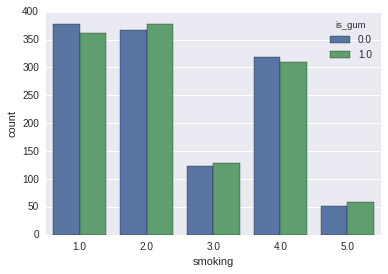

In [39]:
g = sns.countplot(x='smoking', hue='is_gum',  data=smoking_df)

## Political

In [44]:
political_df = users_df.dropna(subset=['political'])
political_vc = political_df.is_gum.value_counts()
political_vc

1.0    1430
0.0    1222
Name: is_gum, dtype: int64

In [45]:
delta = political_vc[1] - political_vc[0]
delta

208

In [46]:
index_to_del = np.random.choice(political_df[political_df.is_gum == 1].index, delta, replace=False)
political_df.drop(index_to_del, inplace=True)
political_df.is_gum.value_counts()

/home/digitman/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


1.0    1222
0.0    1222
Name: is_gum, dtype: int64

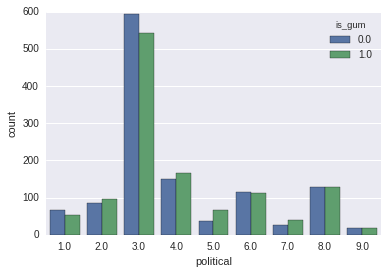

In [47]:
g = sns.countplot(x='political', hue='is_gum',  data=political_df)

## Relation

In [48]:
relation_df = users_df.dropna(subset=['relation'])
relation_vc = relation_df.is_gum.value_counts()
relation_vc

1.0    3912
0.0    3245
Name: is_gum, dtype: int64

In [49]:
delta = relation_vc[1] - relation_vc[0]
delta

667

In [50]:
index_to_del = np.random.choice(relation_df[relation_df.is_gum == 1].index, delta, replace=False)
relation_df.drop(index_to_del, inplace=True)
relation_df.is_gum.value_counts()

1.0    3245
0.0    3245
Name: is_gum, dtype: int64

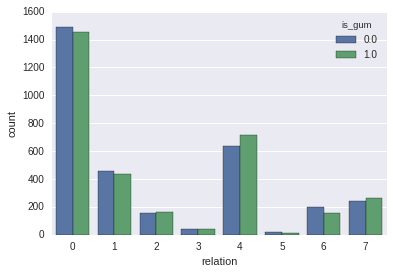

In [51]:
g = sns.countplot(x='relation', hue='is_gum',  data=relation_df)

## Life-main

In [52]:
life_main_df = users_df.dropna(subset=['life_main'])
life_main_vc = life_main_df.is_gum.value_counts()
life_main_vc

1.0    1520
0.0    1166
Name: is_gum, dtype: int64

In [53]:
delta = life_main_vc[1] - life_main_vc[0]
delta

354

In [54]:
index_to_del = np.random.choice(life_main_df[life_main_df.is_gum == 1].index, delta, replace=False)
life_main_df.drop(index_to_del, inplace=True)
life_main_df.is_gum.value_counts()

/home/digitman/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


1.0    1166
0.0    1166
Name: is_gum, dtype: int64

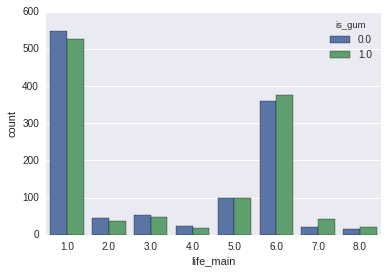

In [55]:
g = sns.countplot(x='life_main', hue='is_gum',  data=life_main_df)

## People-main

In [56]:
people_main_df = users_df.dropna(subset=['people_main'])
people_main_vc = people_main_df.is_gum.value_counts()
people_main_vc

1.0    1561
0.0    1216
Name: is_gum, dtype: int64

In [57]:
delta = people_main_vc[1] - people_main_vc[0]
delta

345

In [58]:
index_to_del = np.random.choice(people_main_df[people_main_df.is_gum == 1].index, delta, replace=False)
people_main_df.drop(index_to_del, inplace=True)
people_main_df.is_gum.value_counts()

/home/digitman/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


1.0    1216
0.0    1216
Name: is_gum, dtype: int64

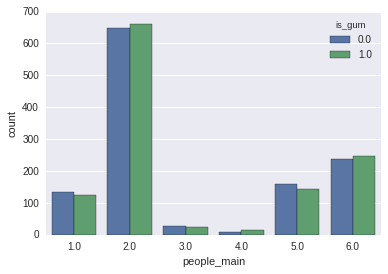

In [59]:
g = sns.countplot(x='people_main', hue='is_gum',  data=people_main_df)

## Month

In [60]:
users_df.bdate = pd.to_datetime(users_df.bdate, errors='coerce')

In [61]:
bdate_df = users_df.dropna(subset=['bdate'])

In [62]:
bdate_vc = bdate_df.is_gum.value_counts()
bdate_vc

1.0    2036
0.0    1730
Name: is_gum, dtype: int64

In [64]:
delta = bdate_vc[1] - bdate_vc[0]
delta

306

In [65]:
index_to_del = np.random.choice(bdate_df[bdate_df.is_gum == 1].index, delta, replace=False)
index_to_del.shape

(306,)

In [66]:
bdate_df.drop(index_to_del, inplace=True)
bdate_df.is_gum.value_counts()

/home/digitman/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


1.0    1730
0.0    1730
Name: is_gum, dtype: int64

In [67]:
bdate_df['bmonth'] = bdate_df.bdate.apply(lambda x: x.month if x else x)

/home/digitman/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


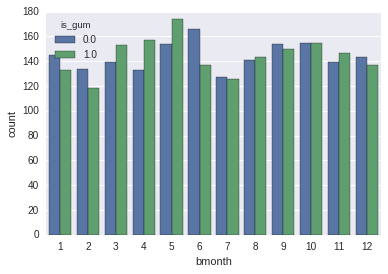

In [68]:
g = sns.countplot(x='bmonth', hue='is_gum',  data=bdate_df)

# Comments

In [24]:
comments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2552261 entries, 0 to 2552260
Data columns (total 9 columns):
attachments     object
comment_id      int64
date            int64
from_id         int64
likes           int64
owner_id        object
reply_to_cid    object
reply_to_uid    object
text            object
dtypes: int64(4), object(5)
memory usage: 175.2+ MB


In [25]:
comments_merged = comments_df.merge(users_df[['id', 'is_gum', 'sex']], left_on='from_id', right_on='id', how='inner')

### Generating hour from comment date

In [26]:
comments_merged['hour'] = comments_merged.date.apply(lambda x: datetime.fromtimestamp(x).hour)

In [27]:
comments_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 164930 entries, 0 to 164929
Data columns (total 13 columns):
attachments     8711 non-null object
comment_id      164930 non-null int64
date            164930 non-null int64
from_id         164930 non-null int64
likes           164930 non-null int64
owner_id        164930 non-null object
reply_to_cid    0 non-null object
reply_to_uid    0 non-null object
text            164930 non-null object
id              164930 non-null int64
is_gum          164930 non-null float64
sex             164930 non-null int64
hour            164930 non-null int64
dtypes: float64(1), int64(7), object(5)
memory usage: 17.6+ MB


In [73]:
comments_merged.head()

,attachments,comment_id,date,from_id,likes,owner_id,reply_to_cid,reply_to_uid,text,id,is_gum,sex,hour
0,None,3222718,1476546928,360037882,1,-33041211,None,None,"[id352784000|Алексей], 2:1",360037882,0.0,2,18
1,None,3222727,1476547133,360037882,35,-33041211,None,None,НАТЯНУЛИ МОСКВиЧЕЙ!!! ТЕПЕРЬ МОЖНО И ДОМОЙ ИХ ...,360037882,0.0,2,18
2,None,3224133,1476602531,360037882,0,-33041211,None,None,"[id34736142|Андрей], не имеет значение где ЮР,...",360037882,0.0,2,10
3,None,3224161,1476604171,360037882,0,-33041211,None,None,"[id34736142|Андрей], где СК удобнее там и пров...",360037882,0.0,2,10
4,None,3199309,1475398737,360037882,9,-33041211,None,None,Сегодня в 23:00 до 5:00 собираемся все НА АРЕН...,360037882,0.0,2,11


In [28]:
comments_merged.sex.value_counts()

2    105902
1     59028
Name: sex, dtype: int64

## Nice plot

In [76]:
comments_merged['Гумманитарий'] = comments_merged.is_gum

In [77]:
comments_merged.Гумманитарий = comments_merged.Гумманитарий.map({0: False, 1: True})

In [78]:
merged_vc = comments_merged.is_gum.value_counts()
merged_vc

1.0    87083
0.0    77847
Name: is_gum, dtype: int64

In [79]:
delta = merged_vc[1] - merged_vc[0]
delta

9236

In [80]:
index_to_del = np.random.choice(comments_merged[comments_merged.is_gum == 1].index, delta, replace=False)

In [81]:
merged_ = comments_merged.drop(index_to_del)
merged_.is_gum.value_counts()

1.0    77847
0.0    77847
Name: is_gum, dtype: int64

In [82]:
%matplotlib inline

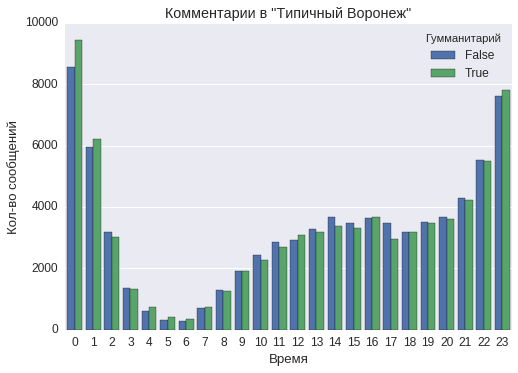

In [83]:
sns.set(font_scale=1.2)
g = sns.countplot(x='hour', hue='Гумманитарий', data=merged_, saturation=0.9)
g.set_ylabel('Кол-во сообщений')
g.set_xlabel('Время')
plt.title('Комментарии в "Типичный Воронеж"')


## Another

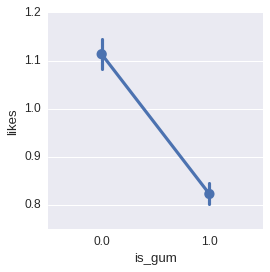

In [84]:
sns.factorplot(x='is_gum', y='likes', data=merged_)

## Saving

In [85]:
index_to_del = merged_[merged_.text == ''].index
merged_.drop(index_to_del, inplace=True)
merged_.shape

(149493, 14)

In [86]:
merged_[['from_id', 'text', 'is_gum', 'hour', 'likes', 'sex']].to_csv('data/comments_.csv.gz',
                                                                       index=False, compression='gzip')